<a href="https://colab.research.google.com/github/mojtaba732/ML_Practice/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

**Entropy** vs **Gini** vs **Error**

In [7]:
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1-p))

def error(p):
  return 1 - np.max([p, 1 - p])


In [8]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

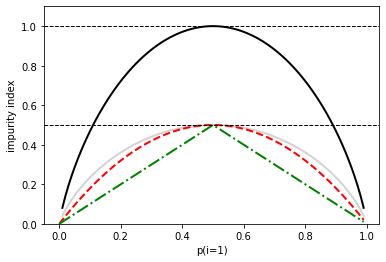

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],['Entropy', 'Entropy (scaled)','Gini impurity','Misclassification error'],['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab,linestyle=ls, lw=2, color=c)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()